In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
lending_club_df = pd.read_csv("lending_club_loans.csv")

<ipython-input-170-586e8932a3e0>:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  lending_club_df = pd.read_csv("lending_club_loans.csv")


In [ ]:
lending_club_df.shape

(42535, 115)

In [ ]:
if lending_club_df.duplicated().sum():
  print("Duplicate rows: {}".format(lending_club_df.duplicated().sum()))
else:
  print("No duplicate rows")

No duplicate rows


In [ ]:
lending_club_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
lending_club_df.tail(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
42532,72176,70868,2525,2525,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42533,71623,70735,6500,6500,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,70686,70681,5000,5000,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# As Id is near to the shape we can drop it
print("Dataset having ",lending_club_df.shape[0], "rows ---> Id unique values are" ,len(lending_club_df.id.unique()))

# As Member Id is near to the shape we can drop it
print("Dataset having ",lending_club_df.shape[0], "rows ---> Member Id unique values are" ,len(lending_club_df.member_id.unique()))

Dataset having  42535 rows ---> Id unique values are 42535
Dataset having  42535 rows ---> Member Id unique values are 42535


In [ ]:
lending_club_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(81), int64(10), object(24)
memory usage: 37.3+ MB


In [ ]:
lending_club_df.shape

(42535, 115)

In [ ]:
# Method to find the columns which are having more unique values 

def unique_col(dataset):
  uniq_col=[]
  for i in dataset.columns:
    if (len(dataset[i].unique())/len(dataset))*100>40.0:
      print(i,' --> ',(len(dataset[i].unique())/len(dataset))*100)
      uniq_col.append(i)
  return uniq_col

In [ ]:
remove_col = unique_col(lending_club_df)
print("columns need to remove: ",remove_col)

id  -->  100.0
member_id  -->  100.0
emp_title  -->  72.07946397084754
url  -->  100.0
desc  -->  68.09451040319736
title  -->  49.96826143176208
revol_bal  -->  53.38897378629363
total_pymnt  -->  95.40143411308334
total_pymnt_inv  -->  94.29411073233808
total_rec_int  -->  88.24027271658635
last_pymnt_amnt  -->  87.26225461384742
columns need to remove:  ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt']


Above we can see that the columns having more than 40% unique values will be droped out

In [ ]:
lending_club_df = lending_club_df.drop(remove_col,axis=1)

Let us fint out the variables which are having more number of missing values, should be droped from the dataset.

<Axes: >

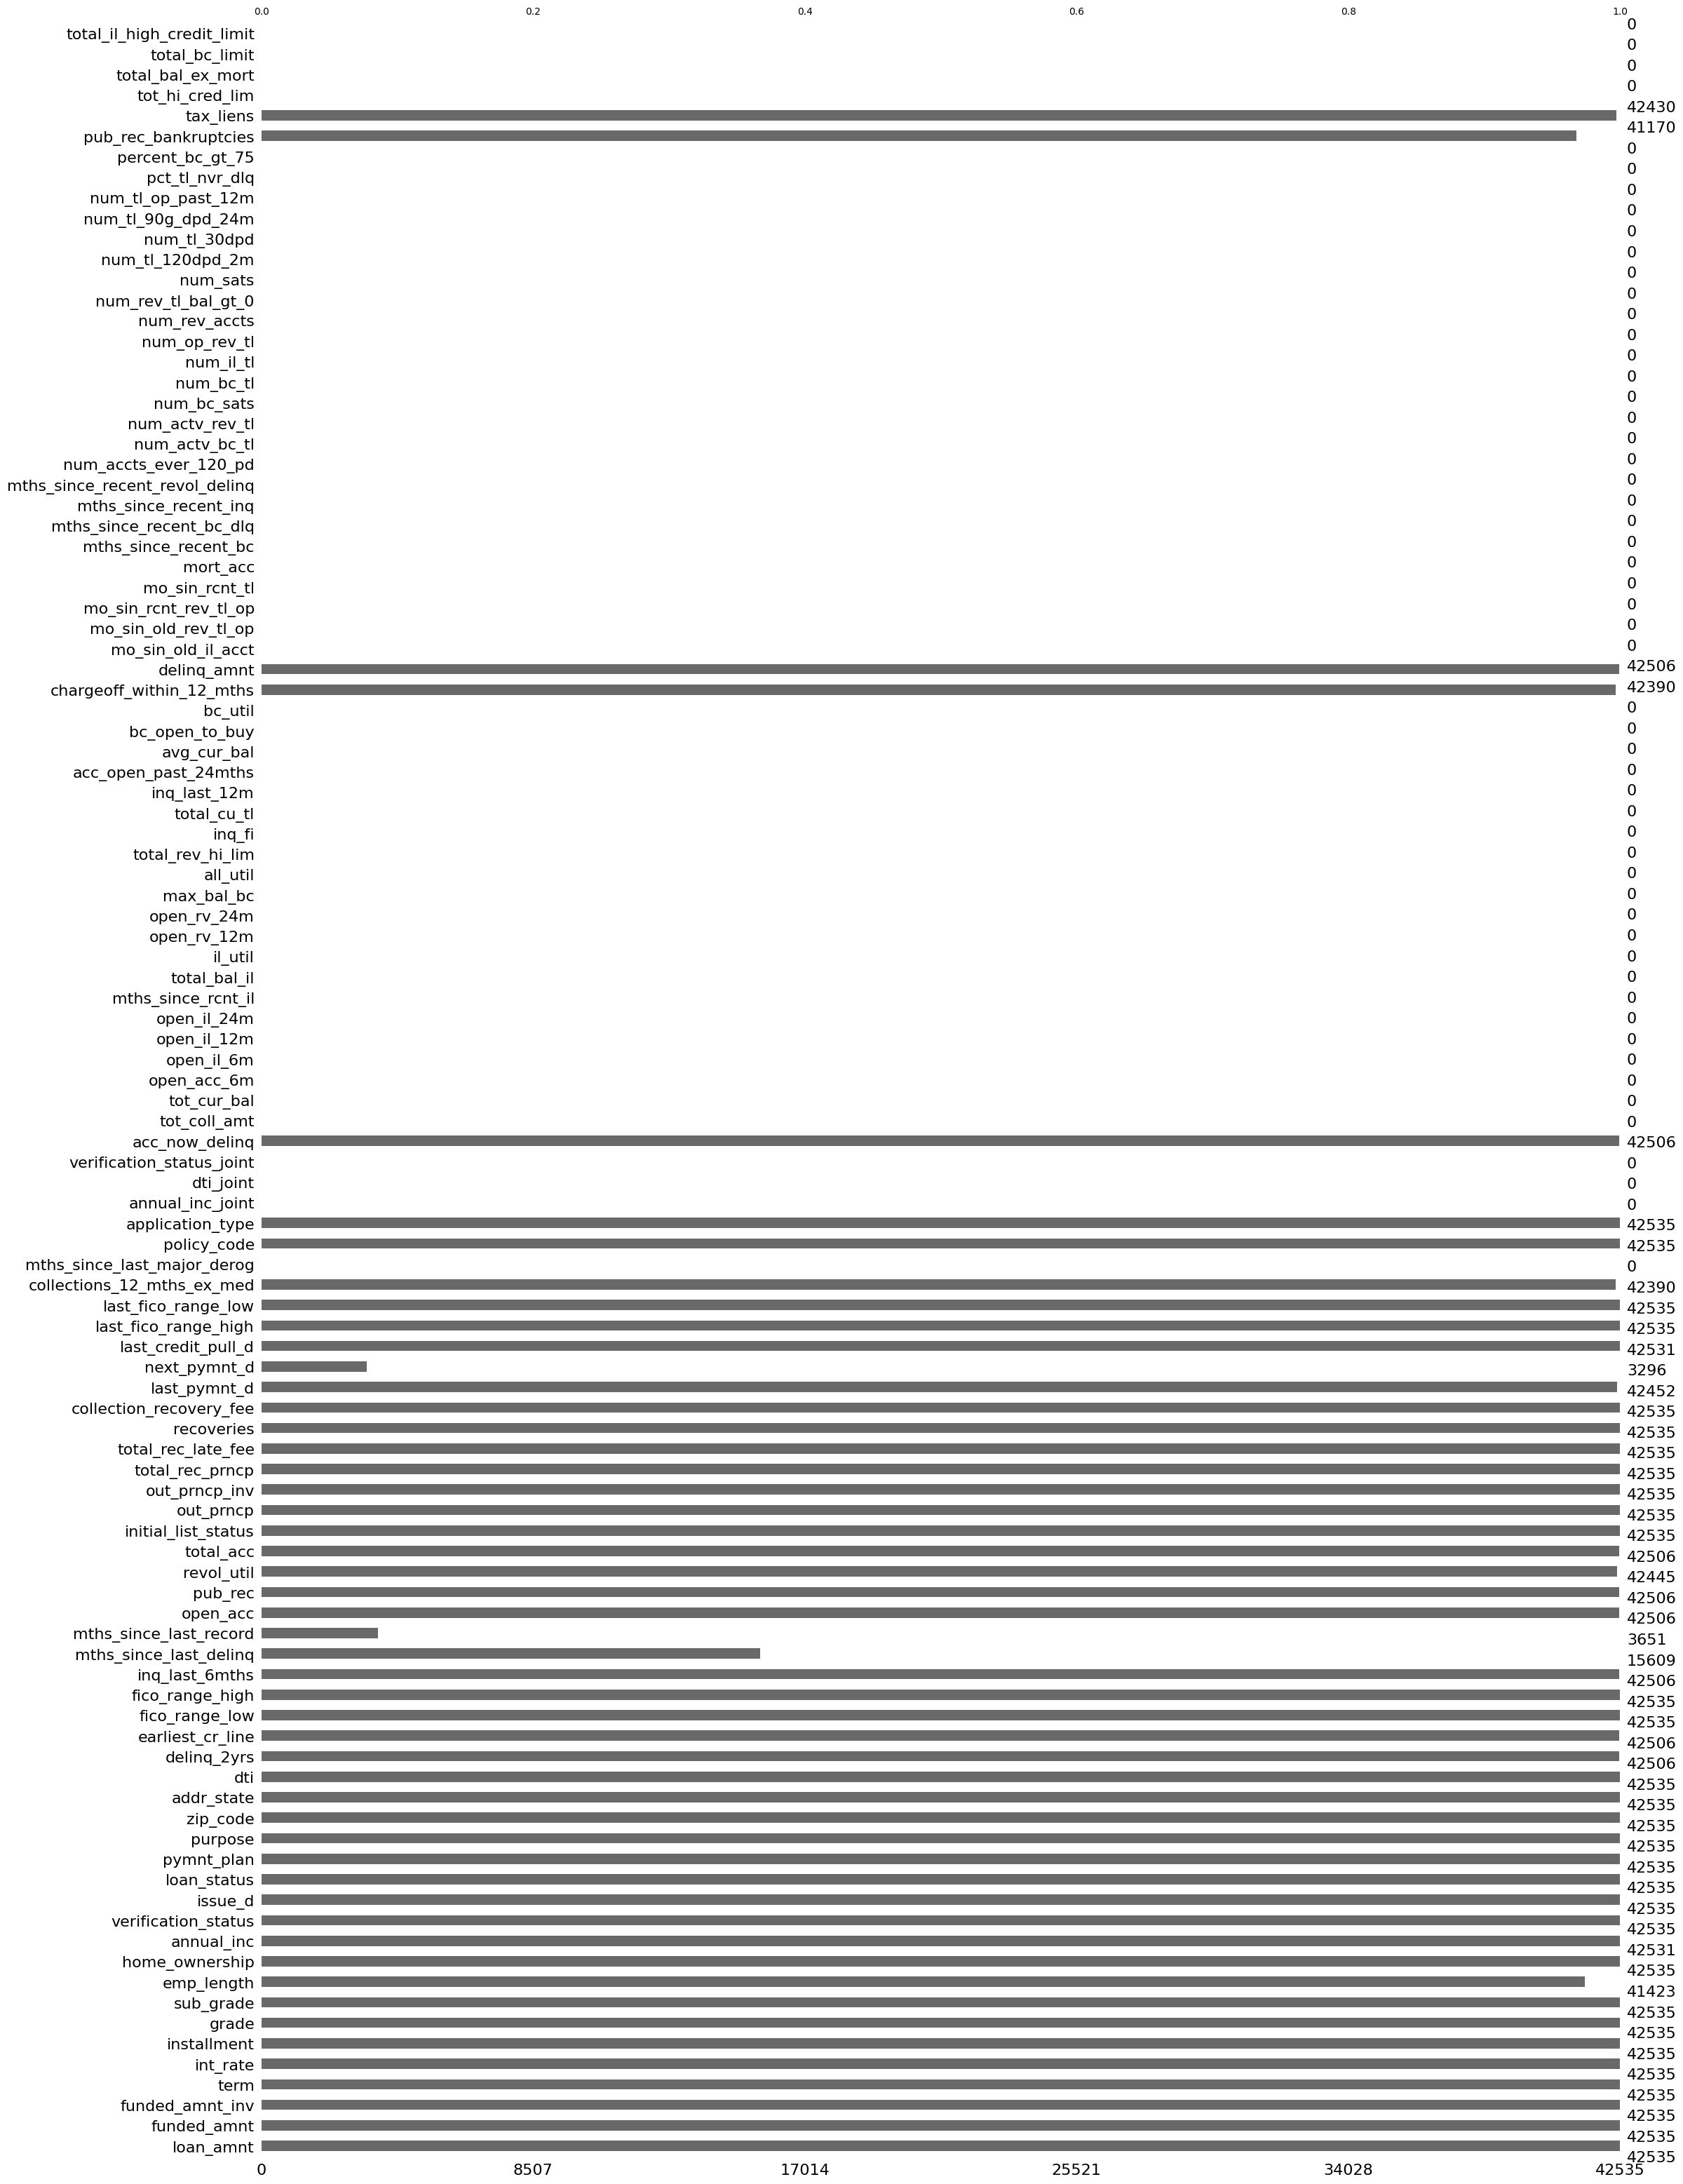

In [ ]:
import missingno as msno
msno.bar(lending_club_df)

In [ ]:
d = lending_club_df.isnull().sum().sort_values(ascending=False)
c=0
missing_values = []
missing_impute = []
for key,value in d.iteritems():
  if value/len(lending_club_df)*100>40.00:
    print(key," --> ",value/len(lending_club_df)*100)
    missing_values.append(key)
    c+=1
  elif value/lending_club_df.shape[0] != 0:
    missing_impute.append(key)
print("Number of Missing values more than 40%: ", c)
print("Remaining number of variables : ",abs(lending_club_df.shape[1]-c))

open_acc_6m  -->  100.0
mort_acc  -->  100.0
mo_sin_rcnt_rev_tl_op  -->  100.0
mo_sin_old_rev_tl_op  -->  100.0
mo_sin_old_il_acct  -->  100.0
bc_util  -->  100.0
bc_open_to_buy  -->  100.0
avg_cur_bal  -->  100.0
acc_open_past_24mths  -->  100.0
inq_last_12m  -->  100.0
total_cu_tl  -->  100.0
inq_fi  -->  100.0
total_rev_hi_lim  -->  100.0
all_util  -->  100.0
max_bal_bc  -->  100.0
open_rv_24m  -->  100.0
open_rv_12m  -->  100.0
il_util  -->  100.0
total_bal_il  -->  100.0
mths_since_rcnt_il  -->  100.0
open_il_24m  -->  100.0
open_il_12m  -->  100.0
open_il_6m  -->  100.0
mo_sin_rcnt_tl  -->  100.0
mths_since_recent_bc  -->  100.0
tot_coll_amt  -->  100.0
mths_since_recent_bc_dlq  -->  100.0
total_bc_limit  -->  100.0
total_bal_ex_mort  -->  100.0
tot_hi_cred_lim  -->  100.0
percent_bc_gt_75  -->  100.0
pct_tl_nvr_dlq  -->  100.0
num_tl_op_past_12m  -->  100.0
num_tl_90g_dpd_24m  -->  100.0
num_tl_30dpd  -->  100.0
num_tl_120dpd_2m  -->  100.0
num_sats  -->  100.0
num_rev_tl_bal_gt

<ipython-input-182-312129425697>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in d.iteritems():


We can see that the out of ***104*** variables ***57*** are have more number of missing values, we are drping them from our dataset

In [ ]:
# As Id and Member Id are having all the unique values we can drop that 

print("Before Droping the data: ", lending_club_df.shape)
lending_club_df = lending_club_df.drop(missing_values,axis=1)
print("After Droping the more mssing values data: ", lending_club_df.shape)

Before Droping the data:  (42535, 104)
After Droping the more mssing values data:  (42535, 47)


In [ ]:
for i in lending_club_df.columns[lending_club_df.dtypes == object]:
  print(lending_club_df[i].value_counts(dropna=False))
  print('*'*30)

 36 months    31534
 60 months    11001
Name: term, dtype: int64
******************************
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64
******************************
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
******************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
******************************
10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year 

As per the above observations we are dropping the below variables as there are only one level in it and which will make model biased.
pymnt_plan, initial_list_status, application_type, zip_code, addr_state 

In [ ]:
lending_club_df = lending_club_df.drop(['pymnt_plan','initial_list_status','application_type','zip_code','addr_state'],axis=1)
print(lending_club_df.shape)

(42535, 42)


In [ ]:
lending_club_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  int64  
 1   funded_amnt                 42535 non-null  int64  
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  object 
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_length                  41423 non-null  object 
 9   home_ownership              42535 non-null  object 
 10  annual_inc                  42531 non-null  float64
 11  verification_status         42535 non-null  object 
 12  issue_d                     42535 non-null  object 
 13  loan_status                 425

# Exploratory Data Analysis & Data Cleaning

In [ ]:
lending_club_df.select_dtypes(include=object).head(3)

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Jan-85,83.70%,Jan-15,Sep-16
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,Apr-99,9.40%,Apr-13,Sep-16
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,Nov-01,98.50%,Jun-14,Sep-16


Need to **clean** the below Object variable data.

**Term**: As the Data in 2 levels no need to clean it up.

**int_rate, revo_util**: Need to trim the data.

**issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d**:Need to split the data.

In [ ]:
# int_rate variable need to convert Numaric
def clean(data):
  a=[]
  for i in range(len(data)):
    if lending_club_df['revol_util'][i] == np.nan:
      a.append(np.nan)    
    elif type(lending_club_df['revol_util'][i]) == float:
      a.append(lending_club_df['revol_util'][i])
    else:
      a.append(lending_club_df['revol_util'][i].split('%')[0])
    
  return a


In [ ]:
lending_club_df['int_rate'] = clean(lending_club_df['int_rate'])
lending_club_df['revol_util']= clean(lending_club_df['revol_util'])

In [ ]:
# Converting all the Data to %YYYY-%MM-%DD
lending_club_df['issue_d']=pd.to_datetime(lending_club_df['issue_d'], format='%b-%y', yearfirst=False)
lending_club_df['earliest_cr_line']=pd.to_datetime(lending_club_df['earliest_cr_line'], format='%b-%y', yearfirst=False)
lending_club_df['last_pymnt_d']=pd.to_datetime(lending_club_df['last_pymnt_d'], format='%b-%y', yearfirst=False)
lending_club_df['last_credit_pull_d']=pd.to_datetime(lending_club_df['last_credit_pull_d'], format='%b-%y', yearfirst=False)


In [ ]:
# Spliting up the Month and Year
lending_club_df['issue_d_year'] = 2023 - pd.DatetimeIndex(lending_club_df['issue_d']).year
lending_club_df['issue_d_month'] = pd.DatetimeIndex(lending_club_df['issue_d']).month

lending_club_df['earliest_cr_line_year'] = 2023 - pd.DatetimeIndex(lending_club_df['earliest_cr_line']).year
lending_club_df['earliest_cr_line_month'] = pd.DatetimeIndex(lending_club_df['earliest_cr_line']).month

lending_club_df['last_pymnt_d_year'] = 2023 - pd.DatetimeIndex(lending_club_df['last_pymnt_d']).year
lending_club_df['last_pymnt_d_month'] = pd.DatetimeIndex(lending_club_df['last_pymnt_d']).month

lending_club_df['last_credit_pull_d_year'] = 2023 - pd.DatetimeIndex(lending_club_df['last_credit_pull_d']).year
lending_club_df['last_credit_pull_d_month'] = pd.DatetimeIndex(lending_club_df['last_credit_pull_d']).month


In [ ]:
lending_club_df = lending_club_df.drop(['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'],axis=1)

In [ ]:
lending_club_df['term'] = lending_club_df['term'].apply(lambda x:x[1:3])

In [ ]:
lending_club_df['term'] = lending_club_df['term'].astype(float)
lending_club_df['int_rate'] = lending_club_df['int_rate'].astype(float)
lending_club_df['revol_util'] = lending_club_df['revol_util'].astype(float)


In [ ]:
for i in lending_club_df.columns:
  if len(lending_club_df[i].unique())<=15:
    print(lending_club_df[i].value_counts(dropna=False))
    print('-'*45)

36.0    31534
60.0    11001
Name: term, dtype: int64
---------------------------------------------
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
---------------------------------------------
10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
NaN          1112
Name: emp_length, dtype: int64
---------------------------------------------
RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64
---------------------------------------------
Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64
---------------------------------------------
Fully Paid                                             33586
Charged Off                                             5653
Does 

By Checking the numaric value count for some columns we got to know that the below columns need to be drop as they conatins only one value it makes model to bias.

- acc_now_delinq, chargeoff_within_12_mths, collections_12_mths_ex_med, delinq_amnt, policy_code, tax_liens 

In [ ]:
lending_club_df.drop(['acc_now_delinq','chargeoff_within_12_mths',
         'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1,inplace=True)

In [ ]:
lending_club_df.shape

(42535, 40)

# Missing Values

In [ ]:
lending_club_df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies        1365
emp_length                  1112
int_rate                      90
revol_util                    90
last_pymnt_d_month            83
last_pymnt_d_year             83
pub_rec                       29
delinq_2yrs                   29
earliest_cr_line_month        29
earliest_cr_line_year         29
total_acc                     29
open_acc                      29
inq_last_6mths                29
last_credit_pull_d_year        4
last_credit_pull_d_month       4
annual_inc                     4
dti                            0
collection_recovery_fee        0
funded_amnt_inv                0
term                           0
installment                    0
grade                          0
sub_grade                      0
issue_d_month                  0
issue_d_year                   0
home_ownership                 0
last_fico_range_low            0
last_fico_range_high           0
recoveries                     0
fico_range_low                 0
total_rec_

In [ ]:
a = ['pub_rec_bankruptcies','emp_length','last_pymnt_d_month','pub_rec','earliest_cr_line_month','inq_last_6mths','last_credit_pull_d_month']
b = ['int_rate','revol_util','last_pymnt_d_year','delinq_2yrs','earliest_cr_line_year','total_acc','open_acc','last_credit_pull_d_year','annual_inc']

In [ ]:
for i in a:
  print(lending_club_df[i].value_counts(dropna=False))
  print('-'*30)

0.0    39316
1.0     1846
NaN     1365
2.0        8
Name: pub_rec_bankruptcies, dtype: int64
------------------------------
10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
NaN          1112
Name: emp_length, dtype: int64
------------------------------
3.0     4063
9.0     3894
12.0    3731
7.0     3613
8.0     3602
10.0    3492
2.0     3480
5.0     3435
4.0     3430
6.0     3296
1.0     3253
11.0    3163
NaN       83
Name: last_pymnt_d_month, dtype: int64
------------------------------
0.0    40130
1.0     2298
2.0       64
NaN       29
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64
------------------------------
10.0    4396
12.0    4317
11.0    4196
9.0     3839
1.0     3673
8.0     3530
7.0     3272
6.0     3148
5.0     3107
2.0     3077
3.0     2991
4.0     2960
NaN       29
Name: earliest_cr_line_month, dtype: int

In [ ]:
lending_club_df[a]

,pub_rec_bankruptcies,emp_length,last_pymnt_d_month,pub_rec,earliest_cr_line_month,inq_last_6mths,last_credit_pull_d_month
0,0.0,10+ years,1.0,0.0,1.0,1.0,9.0
1,0.0,< 1 year,4.0,0.0,4.0,5.0,9.0
2,0.0,10+ years,6.0,0.0,11.0,2.0,9.0
3,0.0,10+ years,1.0,0.0,2.0,1.0,4.0
4,0.0,1 year,9.0,0.0,1.0,0.0,9.0
...,...,...,...,...,...,...,...
42530,NaN,< 1 year,3.0,NaN,NaN,NaN,2.0
42531,NaN,< 1 year,6.0,NaN,NaN,NaN,9.0
42532,NaN,< 1 year,6.0,NaN,NaN,NaN,5.0
42533,NaN,< 1 year,6.0,NaN,NaN,NaN,8.0


In [ ]:
lending_club_df['emp_length'].value_counts(dropna=False)

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
NaN          1112
Name: emp_length, dtype: int64

In [ ]:
lending_club_df['emp_length'].value_counts(dropna=False)

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
NaN          1112
Name: emp_length, dtype: int64

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lending_club_df['emp_length'] = pd.DataFrame(le.fit_transform(lending_club_df['emp_length']))

In [ ]:
orginal = lending_club_df[a]
mask = lending_club_df[a].isnull()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import  DecisionTreeClassifier,DecisionTreeRegressor

In [ ]:
impute = IterativeImputer(estimator=DecisionTreeClassifier(),max_iter=20,initial_strategy='most_frequent')

In [ ]:
mice_cat = impute.fit_transform(lending_club_df[a])

In [ ]:
mice_cat = pd.DataFrame(mice_cat,columns=a)

In [ ]:
mice_cat.head(3)

,pub_rec_bankruptcies,emp_length,last_pymnt_d_month,pub_rec,earliest_cr_line_month,inq_last_6mths,last_credit_pull_d_month
0,0.0,1.0,1.0,0.0,1.0,1.0,9.0
1,0.0,10.0,4.0,0.0,4.0,5.0,9.0
2,0.0,1.0,6.0,0.0,11.0,2.0,9.0


In [ ]:
num_impute = IterativeImputer(estimator=DecisionTreeRegressor(),max_iter=20,initial_strategy='mean')

In [ ]:
mic_num = num_impute.fit_transform(lending_club_df[b])

In [ ]:
mice_num_impute = pd.DataFrame(mic_num,columns=b)

In [ ]:
lending_club_df[b] = mice_num_impute
lending_club_df[a] = mice_cat

In [ ]:
lending_club_df.to_csv('clean_lending_club_df.csv')

In [ ]:
lending_club_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 42535 non-null  int64  
 1   funded_amnt               42535 non-null  int64  
 2   funded_amnt_inv           42535 non-null  float64
 3   term                      42535 non-null  float64
 4   int_rate                  42535 non-null  float64
 5   installment               42535 non-null  float64
 6   grade                     42535 non-null  object 
 7   sub_grade                 42535 non-null  object 
 8   emp_length                42535 non-null  float64
 9   home_ownership            42535 non-null  object 
 10  annual_inc                42535 non-null  float64
 11  verification_status       42535 non-null  object 
 12  loan_status               42535 non-null  object 
 13  purpose                   42535 non-null  object 
 14  dti   